# Girsanov Theorem Sampling Replication

Replication of https://commons.wikimedia.org/wiki/File:Girsanov.png &copy; Martin Keller-Ressel, licensed under [GFDL](https://commons.wikimedia.org/wiki/Commons:GNU_Free_Documentation_License,_version_1.2)

![Girsanov.png](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Girsanov.png/640px-Girsanov.png)

## Original R Code

&copy; Martin Keller-Ressel, licensed under [GFDL](https://commons.wikimedia.org/wiki/Commons:GNU_Free_Documentation_License,_version_1.2)

```R
set.seed(145)
par("mar"=c(4,2,2,2))
 
npath <- 30
N <- 1000
t  <- seq(0,1,length=N+1)
sigma = 0.5
nu = - 0.7
hue = 0.03
dampen = 0.25
 
BM.norm <- matrix(rnorm(npath*N,sd=1/sqrt(N),mean=0),ncol = npath)
BM.norm <- rbind(0,apply(BM.norm,2,cumsum))
 
tmat <- matrix(rep(t,npath),ncol=npath,byrow=FALSE)

BM <- sigma*BM.norm + tmat*nu

weights.orig <- matrix(1,ncol=npath,nrow=1)
 
png(file="girsanov.png",height=714,width=1212)
par(mfrow=c(1,2))
plot.new()
plot.window(xlim = c(0,1),ylim=range(BM))
col.orig <- hsv(h=hue,s=0.6*weights.orig,v=.95)
for(i in 1:npath) {
   lines(t,BM[,i],cex=1.5,col=col.orig[i])
}
box(col="grey",cex=1.5)
 
title(sub="30 paths of a Brownian motion with negative drift",line=2,col.sub="grey10")
 
girsanov.weights <- exp(dampen * (-nu/sigma*BM.norm[N,] - 0.5*(nu/sigma)^2))
girsanov.weights <- (girsanov.weights - min(girsanov.weights)) / diff(range(girsanov.weights))
col.girsanov <- hsv(h=hue,s=girsanov.weights,v=0.95)
 
plot.new()
plot.window(xlim = c(0,1),ylim=range(BM))
 
for(i in 1:npath) {
   lines(t,BM[,i],cex=1.5,col=col.girsanov[i])
}
title(sub="The same paths reweighted according to the Girsanov formula",line=2,col.sub="grey10")
box(col="grey",cex=1.5)
dev.off()
```

## Replication with Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
import matplotlib
matplotlib.style.use('seaborn')

In [3]:
rnd = np.random.RandomState(123)

In [4]:
npath = 30
N = 1000
t  = np.linspace(0, 1, N)
sigma = 0.5
nu = -0.7
hue = 0.03
dampen = 0.25

In [5]:
x = rnd.normal(loc=0, scale=1/np.sqrt(N), size=(N, npath))
x = np.cumsum(x, 0)

In [6]:
bm = sigma*x + nu*t.reshape((t.size, 1))
weights = np.ones(shape=(1, npath))

In [7]:
(bm[-1,:] * weights).mean(), nu

(-0.5953426850815603, -0.7)

In [8]:
girsanov_weights = np.exp(-nu/sigma*bm[-1,:] - 0.5*(nu/sigma)**2)

In [9]:
(bm[-1,:] * girsanov_weights).mean(), 0.0

(-0.0627174739124055, 0.0)

In [10]:
damped_weights = girsanov_weights ** dampen
assert np.allclose(damped_weights, np.exp(dampen * (-nu/sigma*bm[-1,:] - 0.5*(nu/sigma)**2)))

In [11]:
normalized_weights = (damped_weights - damped_weights.min()) / np.ptp(damped_weights)

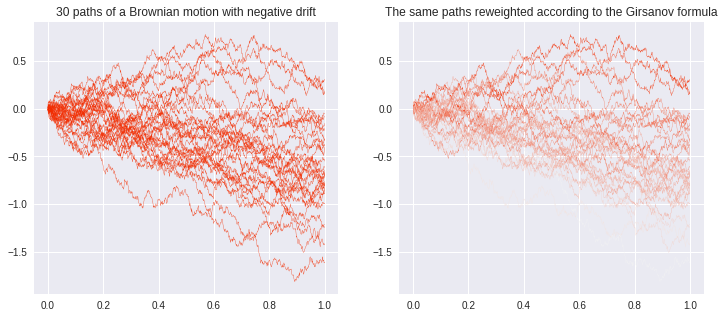

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
linewidth = 0.3
axs[0].plot(t, bm, 'r', linewidth=linewidth, color=colors.hsv_to_rgb((hue, 1.0, 0.95)))
axs[0].set_title('30 paths of a Brownian motion with negative drift')
axs[1].plot(t, bm, 'r', linewidth=linewidth)
axs[1].set_title('The same paths reweighted according to the Girsanov formula')
for i, line in enumerate(axs[1].lines):
    line.set_color(colors.hsv_to_rgb((hue, normalized_weights[i], 0.95)))